---
## PCA and K-Means Clustering
#### Author: Tianyi Mao
---

## Goal of the Project

The goal of this project is to:
1. Simplify and reduce high-dimensional data using Principal Component Analysis (PCA).
2. Identify natural groupings in the dataset using K-means clustering.
3. Visualize and interpret the results to uncover hidden patterns and cluster characteristics.

We are working with the Country Dataset, which contains various socio-economic indicators for multiple countries.


## Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while preserving as much of the original variance as possible. PCA finds principal components (new axes) that maximize the variance in the data.

### Why Use PCA?
- Simplifies complex data for better visualization.
- Removes redundancy in features.
- Improves computational efficiency.

### How PCA Works:
1. Standardize the data.
2. Compute the covariance matrix.
3. Extract eigenvalues and eigenvectors to determine principal components.
4. Project data onto the top principal components.

---

## K-Means Clustering

K-means clustering is an unsupervised algorithm that partitions data into k clusters by minimizing the Within-Cluster Sum of Squares (WCSS).

### Steps in K-Means:
1. Initialize k centroids randomly.
2. Assign data points to the nearest centroid.
3. Update centroids based on the mean of assigned points.
4. Repeat until centroids stabilize or a maximum iteration count is reached.

### Choosing Optimal k:
The Elbow Method is used to determine the optimal number of clusters. It plots WCSS against k and identifies the "elbow point" where WCSS stops decreasing significantly.


## Step 1: Data Preparation and Visualization

- Load the dataset and remove irrelevant columns.
- Check for missing values and handle them.
- Visualize the distributions of numerical features using histograms.
- Use pair plots to observe pairwise relationships.


Missing values in the data:
 child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


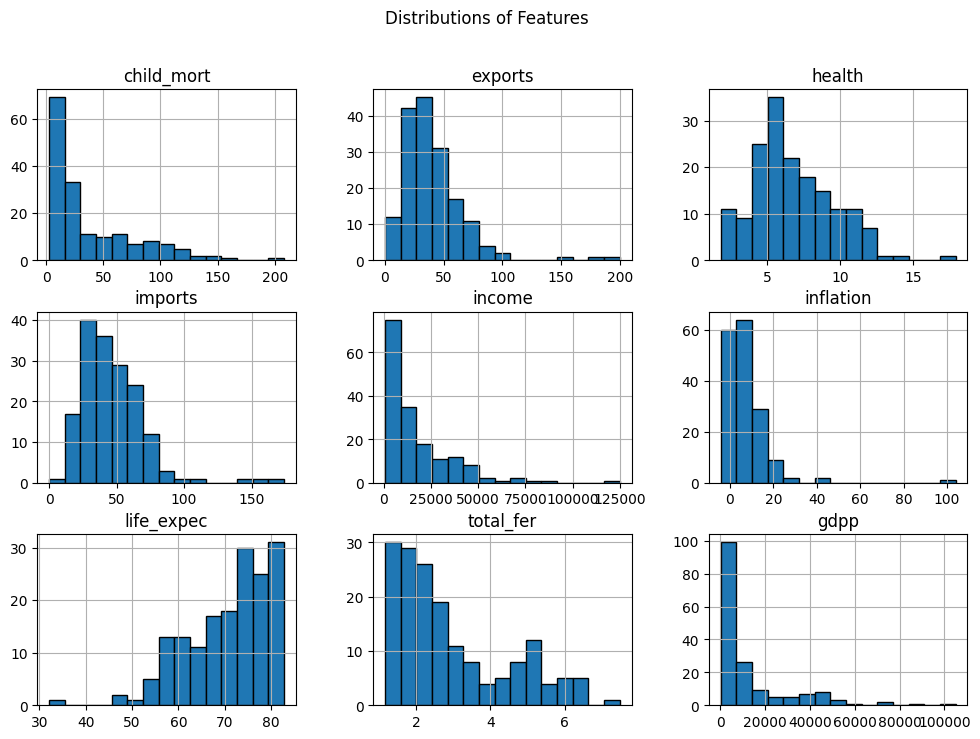

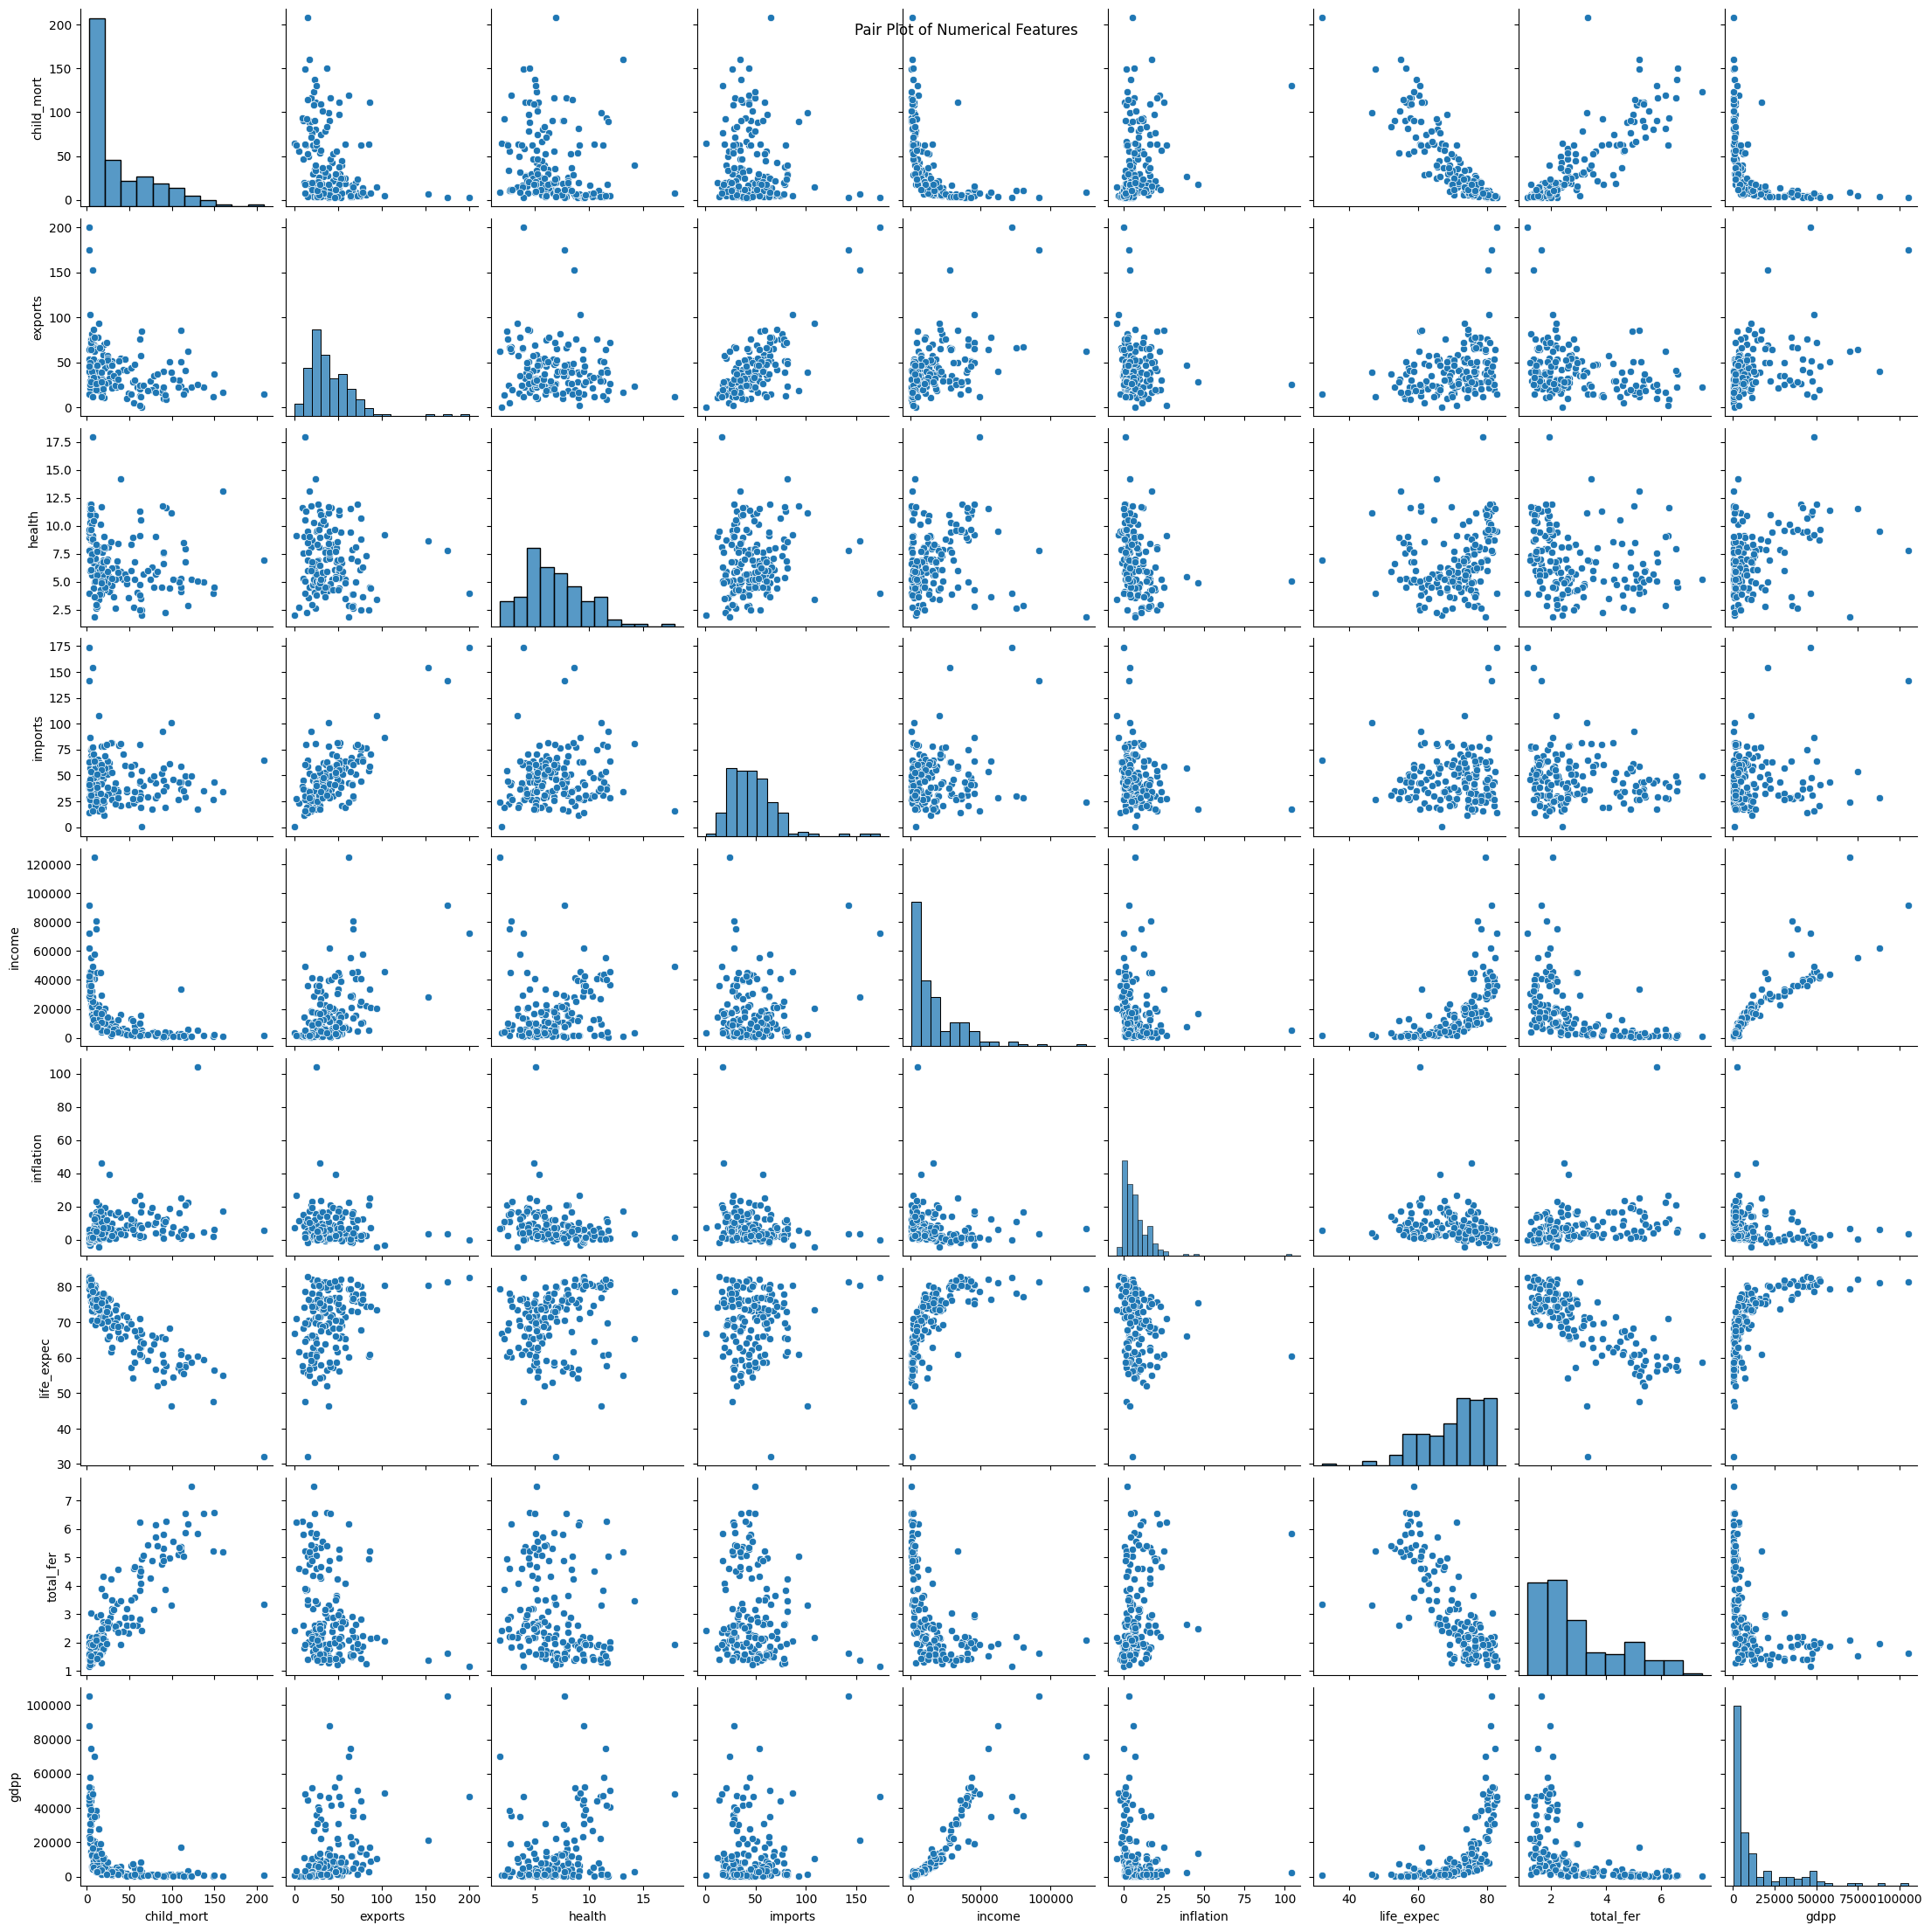

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Country_data/Country-data.csv'
data = pd.read_csv(file_path)

# Drop non-numeric or irrelevant columns
data_numeric = data.drop(columns=['country'])

# Check for missing values
print("Missing values in the data:\n", data_numeric.isnull().sum())

# Visualize distributions of numerical features
data_numeric.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Distributions of Features")
plt.show()

# Pair plot to observe relationships between features
sns.pairplot(data_numeric)
plt.suptitle("Pair Plot of Numerical Features")
plt.show()


## Step 2: Apply PCA

- Standardize the data to ensure all features are on the same scale.
- Use PCA to reduce the data to two dimensions for visualization.
- Plot the transformed data in the PCA space.


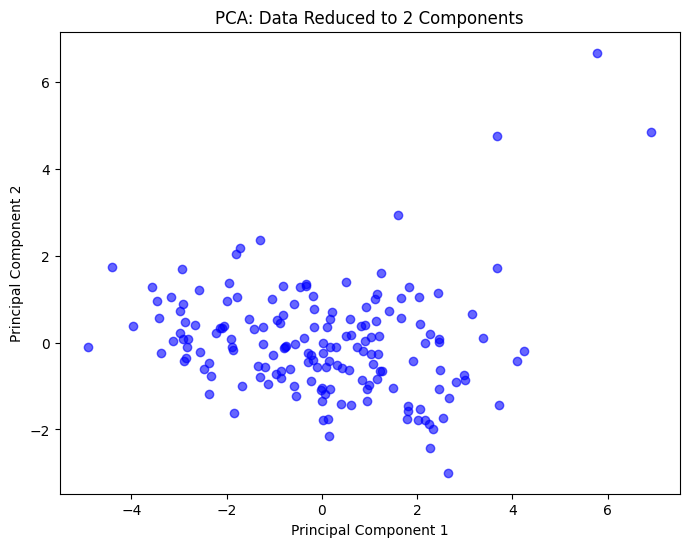

In [20]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Data Reduced to 2 Components")
plt.show()


After dimensionality reduction, the dataset appears more interpretable!

## Step 3: Analyze PCA Results with Scree Plot

- The scree plot shows the variance explained by each principal component.
- Components with high variance contribute the most information.


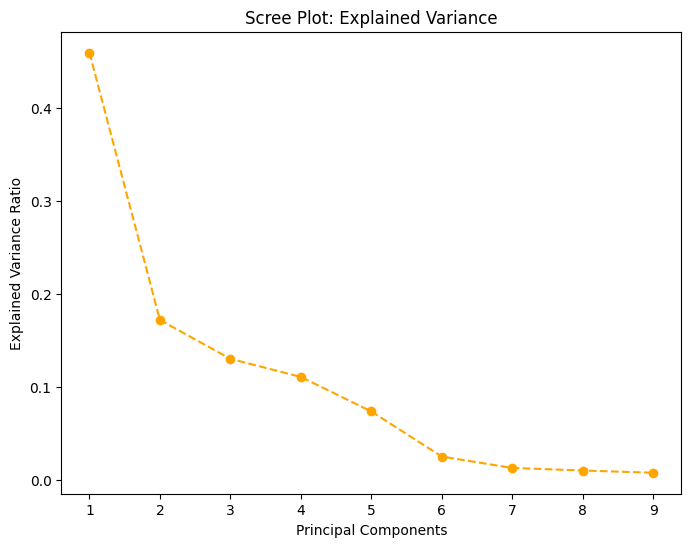

In [21]:
# Scree plot to analyze variance explained
pca_full = PCA().fit(scaled_data)
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o--', color='orange')
plt.title("Scree Plot: Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()


Based on the scree plot, which shows the explained variance ratio for each principal component on x-axis. Based on the result, PC1 explains the largest variance in the data, and then PC2. PC1 and PC2 together capture the most information about the data structure. Therefore, 2 component is recommended as it captures the majority of the variance in the data. 

## Step 4: Determine Optimal k Using Elbow Method

- Compute WCSS for different values of k (1 to 10).
- Plot WCSS against k and identify the "elbow point" where WCSS stops decreasing significantly.


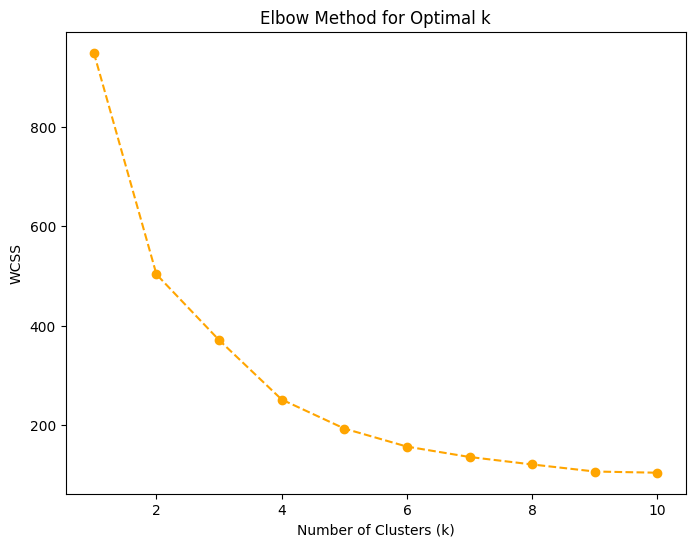

In [22]:
wcss = []

# Compute WCSS for k=1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='orange')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


The elbow point in the plot occurs around k = 3. After this point, the decrease of WCSS starts to slow down. Therefore, I would choose k = 3 to fit clusters. 

## Step 5: K-Means Clustering

- Use the optimal k = 3 determined from the Elbow Method
- Apply K-means clustering to the PCA-transformed data.
- Visualize clusters and centroids.


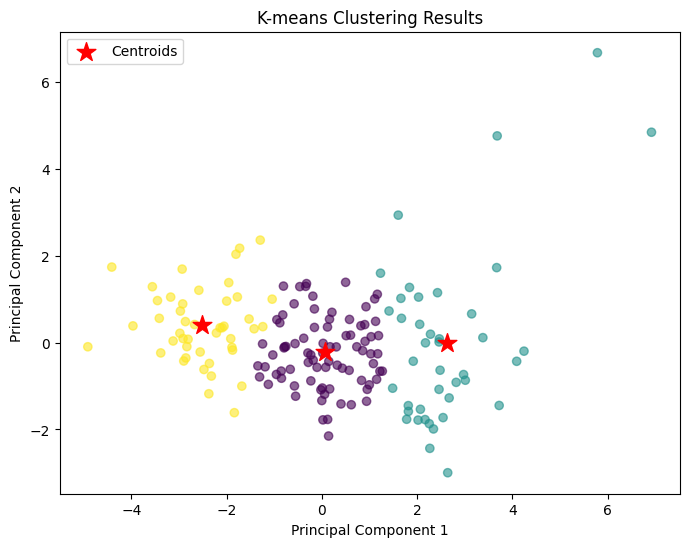

In [23]:
# Apply K-means clustering with optimal k
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='*', s=200, label='Centroids')
plt.title("K-means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


This scatter plot represents the results of K-means clustering applied to the country dataset reduced to 2 principle components using PCA. 
Based on the scatter plot, the data points appear to be divided into three clusters. This means that k-means algorithms have successfully grouped the data. 

## Step 6: Analyze Clusters

- Add cluster labels to the original dataset.
- Calculate summary statistics for each cluster to interpret their characteristics.
- Visualize the average values of features for each cluster.

Cluster Summary:
          child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         23.230864  38.136790  6.374938  45.791358  11856.172840   8.071556   
1          5.339024  61.402439  8.421220  54.758537  42726.829268   2.577439   
2         95.344444  27.969311  6.146222  41.699242   3355.844444  12.002111   

         life_expec  total_fer          gdpp  Cluster  
Cluster                                                
0         72.303704   2.378519   6202.888889      0.0  
1         79.419512   1.753415  38765.121951      1.0  
2         59.333333   5.061333   1626.888889      2.0  


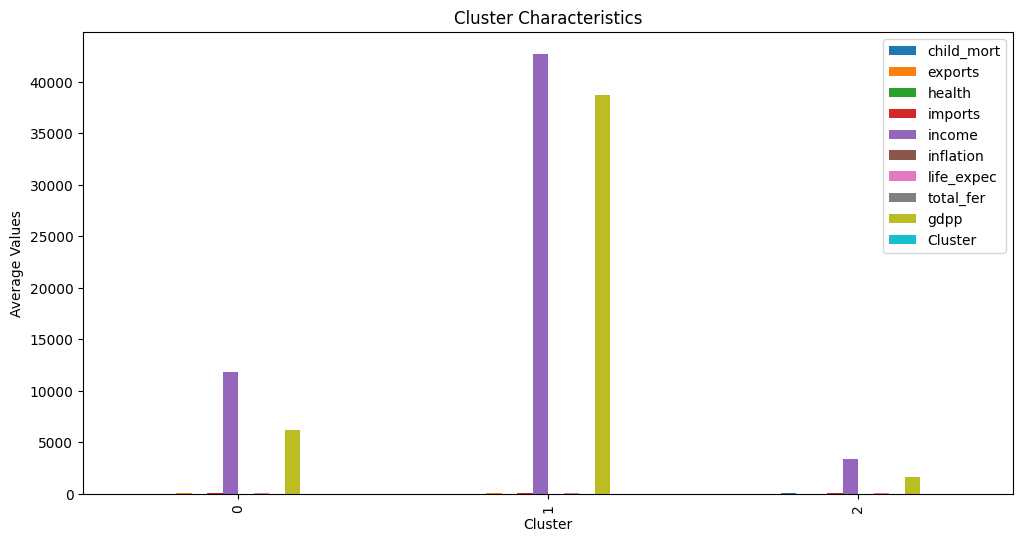

In [26]:
# Add cluster labels to the original data
data['Cluster'] = clusters

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Group by Cluster and compute mean for numeric columns only
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()
print("Cluster Summary:\n", cluster_summary)


# Visualize cluster characteristics
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title("Cluster Characteristics")
plt.ylabel("Average Values")
plt.show()


To further analyze the cluster characteristics, the graph indicates that cluster 1 represents high-income, high-GDP countries with better health indicators. Cluster 0 represents groups of low-income countries with socio-economic challenges. Cluster 2 falls in between. 

Based on cluster characteristics output, cluster 1 has low child mortality rate and a best health indicator with a life expectancy of 79.42. 
Cluster 2 represents lower tier, having high child mortality, low life expectancy and high inflation. 